In [1]:
import warnings
from dotenv import load_dotenv
warnings.filterwarnings('ignore')
load_dotenv(override=True)


True

In [2]:
from typing import Annotated, List, Literal, Union

from langchain_core.messages import ToolMessage
from langchain_core.tools import InjectedToolCallId, tool
from langgraph.prebuilt import InjectedState
from langgraph.types import Command

In [3]:
@tool
def calculator(
    operation: Literal["add", "subtract", "multiply", "divide"],
    a: Union[int, float],
    b: Union[int, float],
)-> Union[int, float]:
    
    """Define a two-input calculator tool.

    Arg:
        operation (str): The operation to perform ('add', 'subtract', 'multiply', 'divide').
        a (float or int): The first number.
        b (float or int): The second number.
        
    Returns:
        result (float or int): the result of the operation
    Example
        Divide: result   = a / b
        Subtract: result = a - b
    """

    if operation == "divide" and b==0 :
        return {"error": "Division by zero is not allowed."}
    
    if operation == 'add':
        result = a + b

    elif operation == 'subtract':
        result = a - b
    elif operation == 'multiply':
        result = a/b
    else: 
        result = "unknown operation"
    return result
    

In [4]:
from langchain.chat_models import init_chat_model
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langchain_groq import ChatGroq
# from utils import format_messages
SYSTEM_PROMPT = "You are a helpful arithmetic assistant who is an expert at using a calculator."

model = ChatGroq(model="openai/gpt-oss-20b", temperature=0.0)
tools = [calculator]

# Create agent
agent = create_react_agent(
    model,
    tools,
    prompt=SYSTEM_PROMPT,
    #state_schema=AgentState,  # default
).with_config({"recursion_limit": 20})  #recursion_limit limits the number of steps the agent will run


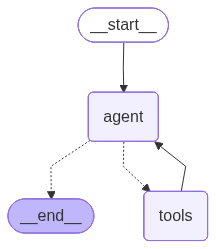

In [5]:
agent

In [6]:
type(agent)

langgraph.graph.state.CompiledStateGraph

In [ ]:
# Example usage
result1 = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is 3.1 * 4.2?",
            }
        ],
    }
)

result1["messages"]

HumanMessage(content='What is 3.1 * 4.2?', additional_kwargs={}, response_metadata={}, id='7fd13ce1-e2fb-41a8-9fd8-8121801e7ed1')

In [11]:

from langgraph.prebuilt.chat_agent_executor import AgentState

def reduce_list(left: list | None, right: list | None) -> list:
    """Safely combine two lists, handling cases where either or both inputs might be None.

    Args:
        left (list | None): The first list to combine, or None.
        right (list | None): The second list to combine, or None.

    Returns:
        list: A new list containing all elements from both input lists.
               If an input is None, it's treated as an empty list.
    """
    if not left:
        left = []
    if not right:
        right = []
    return left + right

class CalcState(AgentState):
    """Graph State."""
    ops: Annotated[List[str], reduce_list]